LINEAR REGRESSION FROM SCRATCH

This notebook implements **Simple and Multiple Linear Regression from scratch** and compares results with scikit-learn.  
**OBJECTIVE**-Predict a target variable from input features using classical regression methods.



**1.SIMPLE LINEAR REGRESSION**


DATASET USED-Years of Experience vs Salary

1.LOAD THE DATSET

In [4]:
from collections.abc import ValuesView
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df=pd.read_csv('Salary_Data.csv')
X=df['YearsExperience'].values
y=df['Salary'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


2.IMPLEMENT SIMPLE LINEAR REGRESSION FROM SCRATCH

In [14]:
class linearreg:
  def __init__(self):
    self.m=None
    self.c=None

  def fit(self,X_train,y_train):
     num=0
     den=0
     for i in range(X_train.shape[0]):
       num=num+((X_train[i]-X_train.mean())*(y_train[i]-y_train.mean()))
       den=den+((X_train[i]-X_train.mean()))*(X_train[i]-X_train.mean())

     self.m=num/den
     self.c=y_train.mean()-(self.m*X_train.mean())

  def predict(self,X_test):
    return self.m*X_test+self.c


3.TRAIN THE SCRATCH MODEL

In [15]:
model=linearreg()
model.fit(X_train,y_train)
y_pred_scratch=model.predict(X_test)

4.EVALUATE THE MODEL

In [16]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,y_pred_scratch)
r2=r2_score(y_test,y_pred_scratch)
print("MSE :",mse)
print("r2_score:",r2)


MSE : 49830096.85590839
r2_score: 0.9024461774180497


5.COMPARE WITH SCIKIT LEARN

In [19]:
sci_model=LinearRegression()
sci_model.fit(X_train.reshape(-1,1),y_train)
sci_pred=sci_model.predict(X_test.reshape(-1,1))
mse_sci=mean_squared_error(y_test,sci_pred)
r2_sci=r2_score(y_test,sci_pred)
print("MSE :",mse_sci)
print("r2_score:",r2_sci)

MSE : 49830096.85590839
r2_score: 0.9024461774180497


6.VISUALIZE THE PREDICTIONS

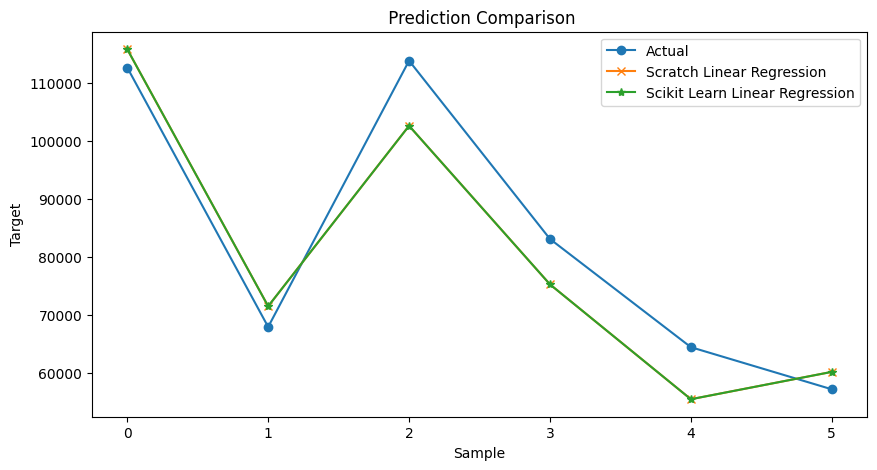

In [21]:
plt.figure(figsize=(10,5))
plt.plot(y_test,label='Actual',marker='o')
plt.plot(y_pred_scratch,label="Scratch Linear Regression",marker='x')
plt.plot(sci_pred,label="Scikit Learn Linear Regression",marker='*')
plt.title(" Prediction Comparison")
plt.xlabel("Sample")
plt.ylabel("Target")
plt.legend()
plt.show()

**2.MULTIPLE LINEAR REGRESSION**



DATASET USED-BOSTON HOUSING DATASET

1>LOAD THE DATASET AND HANDLE MISSING VALUES

In [57]:
df2=pd.read_csv('HousingData.csv')
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df2_imputed = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)
X2 = df2_imputed.drop('MEDV', axis=1)
y2 = df2_imputed['MEDV']

X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.2,random_state=42)





3.IMPLEMENT MULTIPLE LINEAR REGRESSION FROM SCRATCH

In [58]:
class multiplelinearreg():
  def __init__(self):
    self.coef_=None
    self.intercept_=None

  def fit(self,X2_train,y2_train):
    X2_train = X2_train.values
    y2_train = y2_train.values
    X2_train=np.insert(X2_train,0,1,axis=1)

    betas=np.linalg.inv(np.dot(X2_train.T,X2_train)).dot(X2_train.T).dot(y2_train)
    self.intercept_=betas[0]
    self.coef_=betas[1:]

  def predict(self,X2_test):

    X2_test = X2_test.values
    y_pred=self.intercept_+np.dot(X2_test,self.coef_)
    return y_pred

3.TRAIN THE SCRATCH MODEL

In [59]:
model2=multiplelinearreg()
model2.fit(X2_train,y2_train)
y2_pred_scratch=model2.predict(X2_test)

4.EVALUATE THE MODEL

In [60]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y2_test,y2_pred_scratch)
r2=r2_score(y2_test,y2_pred_scratch)
print("MSE :",mse)
print("r2_score:",r2)


MSE : 24.40700165407877
r2_score: 0.6671792916953436


5.COMPARE WITH SCIKIT LEARN

In [63]:
sci_model2=LinearRegression()
sci_model2.fit(X2_train,y2_train)
sci_pred2=sci_model2.predict(X2_test)
mse_sci2=mean_squared_error(y2_test,sci_pred2)
r2_sci2=r2_score(y2_test,sci_pred2)
print("MSE :",mse_sci2)
print("r2_score:",r2_sci2)

MSE : 24.40700165407436
r2_score: 0.6671792916954038


6.VISUALIZE THE PREDICTIONS

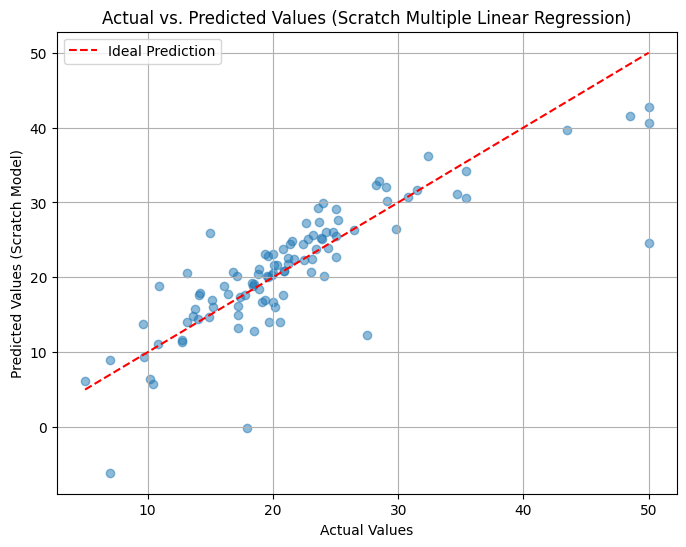

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(y2_test, y2_pred_scratch, alpha=0.5)
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'r--', label='Ideal Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (Scratch Model)")
plt.title("Actual vs. Predicted Values (Scratch Multiple Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()

CONCLUSION-




We successfully implemented Simple and Multiple Linear Regression from scratch and compared the results with scikit-learn models. The manually computed coefficients and predictions closely matched scikit-learn’s output, confirming the correctness of our implementation. This exercise reinforced the linear algebra behind regression and the underlying mechanics of model training and prediction.It can also be easily extended to regularized regression models like Lasso and Ridge.

References
YouTube Tutorial: "Building a Linear Regression Model from Scratch" by CampusX, available at https://youtu.be/dXHIDLPKdmA?si=ucNn9oIJs_wcgSo4.